# RL + simulator vs RL graphs

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({'font.size': 12})

### import data

In [2]:
scores_rl_sim_mse_path = 'scores_8_rl_sim_mse.pkl'
scores_rl_mse_path = 'scores_8_rl_mse.pkl'
scores_rl_sim_mspe_path = 'scores_8_rl_sim_mspe.pkl'
scores_rl_mspe_path = 'scores_8_rl_mspe.pkl'

mse_scores = {}
mspe_scores = {}

with open(scores_rl_sim_mse_path, 'rb') as f:
    mse_scores['rl+sim mse'] = pickle.load(f)
with open(scores_rl_mse_path, 'rb') as f:
    mse_scores['rl mse'] = pickle.load(f)
with open(scores_rl_sim_mspe_path, 'rb') as f:
    mspe_scores['rl+sim mspe'] = pickle.load(f)
with open(scores_rl_mspe_path, 'rb') as f:
    mspe_scores['rl mspe'] = pickle.load(f)

### plot function

In [3]:
def moving_average(data_set, periods=3):
    weights = np.ones(periods) / periods
    return np.convolve(data_set, weights, mode='valid')

def plot_scores(scores, y_min=None, skip_first=1, moving_average_period=None, max_accumulate=False, add_to_title=''):
    fig = plt.figure(figsize=(8, 5))
    for name, score in scores.items():
        plot_score = score
        title = 'Training Scores'
        if add_to_title:
            title = add_to_title + ' ' + title
        if moving_average_period is not None:
            plot_score = moving_average(plot_score[skip_first:], moving_average_period)
            title = f'Moving average {moving_average_period} ' + title
        if max_accumulate:
            plot_score = np.maximum.accumulate(plot_score)
            title = 'Maximum accumulate ' + title
        plt.plot(plot_score[skip_first:], label=name, alpha=0.7)
        plt.ylabel('Scores')
        plt.xlabel('Episode #')
        plt.grid(True)
        plt.legend()
        if y_min is not None:
            plt.ylim(y_min, 0)
            title += f' (y_min={y_min})'
        plt.title(title)
    plt.show()
    


### MSE

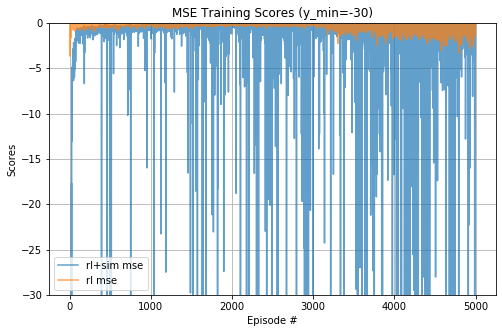

In [4]:
# just scores
plot_scores(mse_scores, -30, add_to_title="MSE")

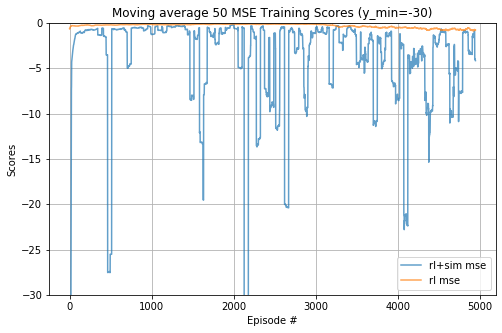

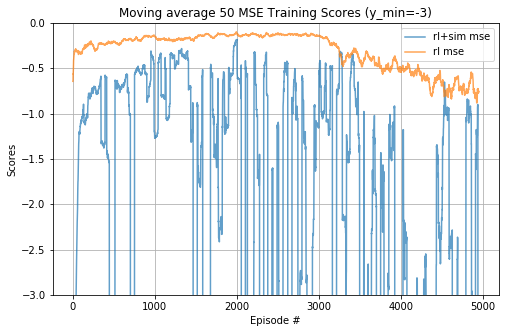

In [5]:
# moving average
plot_scores(mse_scores, -30, moving_average_period=50, add_to_title="MSE")
plot_scores(mse_scores, -3, moving_average_period=50, add_to_title="MSE")

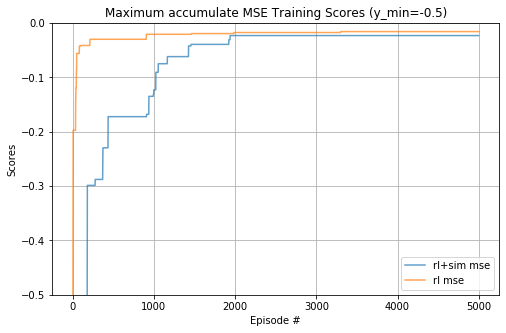

In [6]:
# max scores
plot_scores(mse_scores, -0.5, max_accumulate=True, add_to_title="MSE")

### MSPE

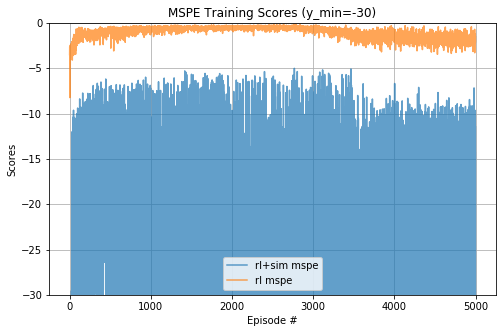

In [7]:
# just scores
plot_scores(mspe_scores, -30, add_to_title="MSPE")

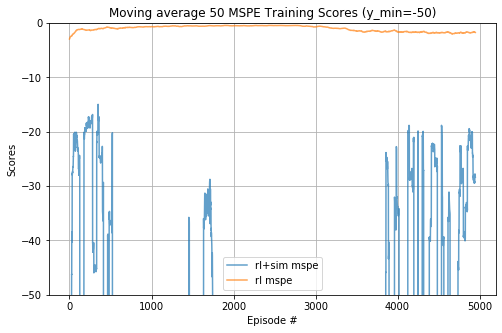

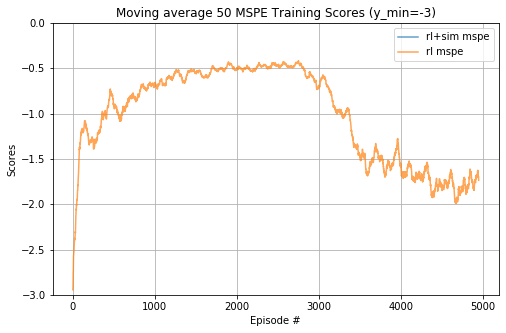

In [8]:
# moving average
plot_scores(mspe_scores, -50, moving_average_period=50, add_to_title="MSPE")
plot_scores(mspe_scores, -3, moving_average_period=50, add_to_title="MSPE")

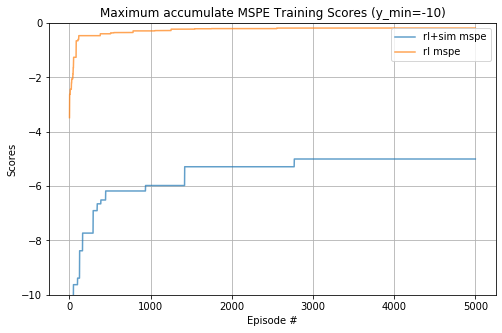

In [9]:
# max scores
plot_scores(mspe_scores, -10, max_accumulate=True, add_to_title="MSPE")